# 1.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [93]:
#Cargar y verificar integridad de los datos. Realizar curación si corresponde.
data = pd.read_csv('Pokemon.csv')
data.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [94]:
#some values in type 2 are missing, so we will fill them with the value 'None'
data['Type 2'].fillna('None', inplace=True)

# 2.

In [95]:
#Graficar matriz de correlación y realizar un scatter_matrix con plotly.

fig = px.scatter_matrix(data, dimensions=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], color='Legendary')
fig.show()


In [96]:
#total vs legendary, boxplot
fig = px.box(data, x='Legendary', y='Total')
fig.show()


In [97]:
#total of only legendaries vs generation, scatter plot
fig = px.scatter(data, x='Generation', y='Total', color='Legendary')
#average line for total
data_common = data[data['Legendary'] == False]
fig.add_scatter(x=np.arange(1, 7), y=[data_common[data_common['Generation'] == i]['Total'].mean() for i in range(1, 7)], mode='lines', name='Average Total')
data_legendary = data[data['Legendary'] == True]
fig.add_scatter(x=np.arange(1, 7), y=[data_legendary[data_legendary['Generation'] == i]['Total'].mean() for i in range(1, 7)], mode='lines', name='Average Total Legendary')

fig.show()



In [98]:
#ignore name, type 1, type 2, generation, legendary, and total
data_new = data.drop(['Name', 'Type 1', 'Type 2', 'Generation', 'Legendary', 'Total'], axis=1)

# K-MEANS

In [99]:
#K-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()
data_new = scaler.fit_transform(data_new)
n_types = data['Type 1'].nunique()


In [ ]:

kmeans = KMeans(n_clusters=n_types, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_new)

In [101]:
n_types

18

In [102]:
#scatter plot total vs type 1, color by cluster
fig = px.scatter(data, x='Generation', y='Total', color='Cluster')
fig.show()


In [128]:
#get intracluster distance for each cluster
distances_list = []
for j in range(2,30):
    data = pd.read_csv('Pokemon.csv')
    data_new = data.drop(['Name', 'Type 1', 'Type 2', 'Generation', 'Legendary', 'Total'], axis=1)
    data_new = scaler.fit_transform(data_new)
    distance = 0
    kmeans = KMeans(n_clusters=j, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data_new)
    for i in range(j):
        cluster = data[data['Cluster'] == i]
        distance += np.mean(np.linalg.norm(cluster.drop(['Name', 'Type 1', 'Type 2', 'Generation', 'Legendary', 'Total', 'Cluster'], axis=1) - kmeans.cluster_centers_[i], axis=1))
    distances_list.append(distance)

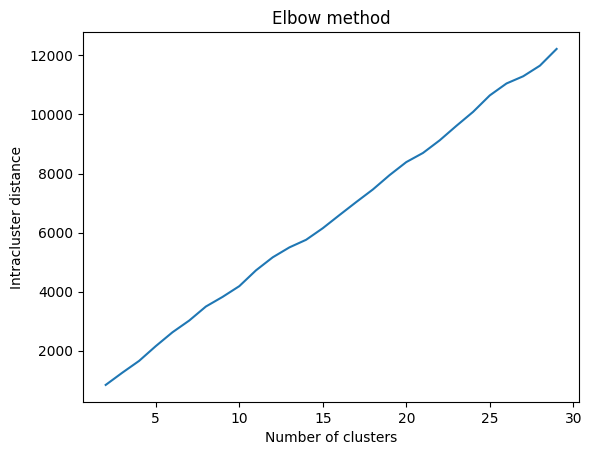

In [119]:
#plot elbow method
plt.plot(np.arange(2,30), distances_list)
plt.xlabel('Number of clusters')
plt.ylabel('Intracluster distance')
plt.title('Elbow method')
plt.show()


In [120]:
data = pd.read_csv('Pokemon.csv')
data_new = data.drop(['Name', 'Type 1', 'Type 2', 'Generation', 'Legendary', 'Total'], axis=1)
data_new = scaler.fit_transform(data_new)
distance = 0
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_new)

In [126]:
fig = px.scatter(data, x='Generation', y='Total', color='Cluster')
fig.show()